# Project: Investigate a Dataset - noshowappointments-kagglev2-may-2016


## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction


### Dataset Description 

Ce dataset recueille des informations sur 100.000 enregistrements de rendez-vous médicaux de différents patients au Brésil  en 2016. Le but principal est de voir si les patients parviennent à respecter leur planning de rendez-vous ou pas.
Le dataset est constitué de 14 variables:

  * **PatientId:** int,Id du patient
  * **AppointmentID:** int, Id du rendez-vous
  * **Gender:** string, Sexe du patient
  * **ScheduledDay:** date, jour que le patient a fixé le rendez-vous
  * **AppointementDay:** date, Jour de rendez-vous
  * **Age:** int, âge du patient
  * **Neighbourhood:** string, localisation hôpital
  * **Scholarship:** variable binaire, vérifiant si le patient est inscrit dans le programme Welfare ou pas. 
  * **Hipertension:** Variable binaire, vérifiant si le patient est hypertendu ou pas.
  * **Diabetes:** Variable binaire, vérifiant si le patient est atteint de diabete ou pas.
  * **Alcoholism:** Variable binaire, vérifiant si le patient est alcoolique ou pas.
  * **Handcap:** Variable binaire, vérifiant si le patient est atteint d'un handicap ou pas.
  * **SMS_received:** Variable binaire, vérifiant si le patient a reçu un sms d'alert ou pas.
  * **NO-show:** Si le patient a pu voir son planning de rendez-vous ou pas.




### Question(s) for Analysis














### Q1: Est-ce que tous les patients qui ont reçu un sms ont pu voir leur rendez-vous?

### Q2: Quelle est la répartition par sexe des patients selon leur participation au programme welfare?

### Q3: Quel est l'âge moyen des patients qui ont pu voir leur planning de rendez-vous?

### Q4: Y a-t-il une relation entre l'hypertension et le diabete?

### Q5: Les patients qui ont pu voir leur rendez-vous ont-ils bénéficiés du programme welfare?

### Q6: Combien de patients femmes ou hommes sont-ils alcooliques?

### Q7:Y a-t-il une corrélation entre le sexe et le diabete?

In [309]:
# Importation des packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling




### General Properties




In [2]:
# Charger le dataset
df_plan = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')
df_plan.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [3]:
# Dimension du dataset
Nb_lignes = df_plan.shape[0]
Nb_col = df_plan.shape[1]

print(f' Dans notre dataset on a {Nb_lignes} lignes et {Nb_col} colonnes ')

 Dans notre dataset on a 110527 lignes et 14 colonnes 


In [4]:
# Description statistiques du dataset
df_plan.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


Dans cette description statistique du jeu de données, on voit que plus de 50% des patients ont plus de 37ans.

In [5]:
# Information générale du dataset
df_plan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


Cette vue générale de notre dataset montre que nous n'avons pas de données manquantes dans les différentes colonnes.Toutefois, on aura à rectifier les types pour certaines variables comme: 

ScheduledDay et AppointementDay en datetime.

In [6]:
# Recherche des doublons
df_plan.duplicated().sum()

0

Donc on a pas de doublons dans notre dataset.

In [7]:
# Nombre de valeurs uniques
df_plan.nunique()

PatientId          62299
AppointmentID     110527
Gender                 2
ScheduledDay      103549
AppointmentDay        27
Age                  104
Neighbourhood         81
Scholarship            2
Hipertension           2
Diabetes               2
Alcoholism             2
Handcap                5
SMS_received           2
No-show                2
dtype: int64

Avec la sortie de cette commande ci-dessus nous pouvons dire que nous avons par exemple 81 hopitaux différents pour les rendez-vous fixés.
On a aussi 5 types d'handicaps différents enregistrés.

### Data Cleaning

Après investigation de notre dataset on a constaté qu'il ne contient beaucoup d'erreurs ou encore de données manquantes. Donc pour cette partie de nettoyage des données nous allons nous focaliser sur:

   * Corriger les types des variables,
   * Changer les noms des colonnes,
   * Choix des variables utiles pour notre analyse.
  
   
   
   
   

In [8]:
#Copier le dataset
df_plan_copi = df_plan

In [9]:
#Changer le type des variables
df_plan_copi['ScheduledDay'] = pd.to_datetime(df_plan_copi['ScheduledDay']) 
df_plan_copi['AppointmentDay'] = pd.to_datetime(df_plan_copi['AppointmentDay'])

In [10]:
#Vue générale des colonnes
df_plan_copi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype              
---  ------          --------------   -----              
 0   PatientId       110527 non-null  float64            
 1   AppointmentID   110527 non-null  int64              
 2   Gender          110527 non-null  object             
 3   ScheduledDay    110527 non-null  datetime64[ns, UTC]
 4   AppointmentDay  110527 non-null  datetime64[ns, UTC]
 5   Age             110527 non-null  int64              
 6   Neighbourhood   110527 non-null  object             
 7   Scholarship     110527 non-null  int64              
 8   Hipertension    110527 non-null  int64              
 9   Diabetes        110527 non-null  int64              
 10  Alcoholism      110527 non-null  int64              
 11  Handcap         110527 non-null  int64              
 12  SMS_received    110527 non-null  int64              
 13  No-show       

In [11]:
#Affichage les colonnes
df_plan_copi.columns

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hipertension',
       'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'No-show'],
      dtype='object')

In [12]:
#Changer les noms des colonnes en français
df_plan_copi.rename(columns = {'PatientId':'IdPatient','AppointmentID':'IdRV','Gender':'sexe','ScheduledDay':'jour_RV_Fixé',
                              'AppointmentDay':'RV_jour','Age':'Age','Neighbourhood':'Localité_hop','Scholarship':'Prog_welfare',
                              'Hipertension':'hypert','Diabetes':'Diabete','Alcoholism':'Alcoolique','Handcap':'Handicapé',
                              'SMS_received':'SMS_reçu','No-show':'RV_Vu'}, inplace = True)

In [13]:
#Affichage des colonnes après les avoir renommées
df_plan_copi.columns

Index(['IdPatient', 'IdRV', 'sexe', 'jour_RV_Fixé', 'RV_jour', 'Age',
       'Localité_hop', 'Prog_welfare', 'hypert', 'Diabete', 'Alcoolique',
       'Handicapé', 'SMS_reçu', 'RV_Vu'],
      dtype='object')

<a id='eda'></a>
## Exploratory Data Analysis

Dans cette partie d'analyse exploratoire, nous aurions à explorer les données en profondeur avec des visualisations en essayant d'apporter des réponses aux questions ou hypothèses soulevées dans l'introduction.


### Q1: Est-ce que tous les patients qui ont reçu un sms ont pu voir leur rendez-vous?

In [128]:
#Grouper rendez-vous Vu par sms reçu, puis calculer la moyenne
RV_group = df_plan_copi.groupby('RV_Vu')['SMS_reçu'].mean()

In [600]:
#Visualisation en barres
def plot_bar(df,arr,xlab,ylab,titre):#Création de la fonction plot_bar
    colors ={'No':'green','Yes':'red'}
    labels=list(colors.keys())
    handles = [plt.Rectangle((0,0),1,1,color = colors[label]) for label in labels]
    col = ['green','red']
    plt.bar(df, arr,color = col,width=0.06)
    plt.xlabel(xlab,fontsize = 15)
    plt.ylabel(ylab, fontsize = 15)
    plt.title(titre,fontsize = 14)
    plt.legend(handles, labels)
    plt.show()


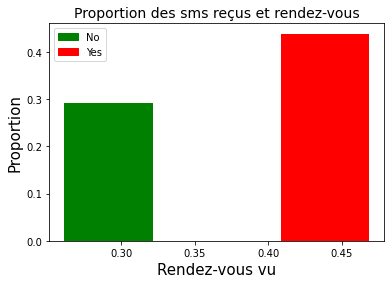

In [601]:
plot_bar(RV_group.SMS_reçu,RV_group.SMS_reçu,'Rendez-vous vu','Proportion',
         'Proportion des sms reçus et rendez-vous')#Appel de la fonction plot_bar

Les données nous révêle que malgré l'envoie d'sms, seulement 43% ont pu voir leur rendez-vous alors que 29% n'ont pas pu les leur.

### Q2: Quelle est la répartition par sexe des patients selon leur participation au programme welfare?

In [540]:
#Récupérer les lignes des patients qui ont bénéficié du programme welfare.
df_welfare = df_plan_copi.query('Prog_welfare == 1')

In [541]:
#compter le nombre de patients ayant bénéficié le programme welfare selon le sexe
df_pie = df_welfare['sexe'].value_counts()

In [614]:
#Création d'une fonction de visualisation pie chart
def plot_pie(df,label1,label2,titre):
    plt.pie(df,startangle = 90,autopct ='%1.2f%%', labels = [label1, label2])
    plt.ylabel('Sexe')
    plt.title(titre,fontsize= 17)

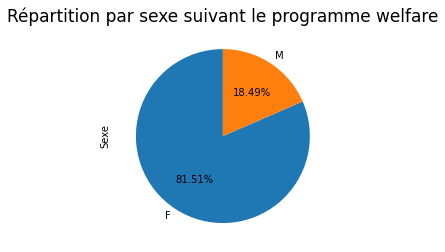

In [615]:
#Visualisation diagramme en secteur suivant le sexe et la participation
#des patients au programme welfare

plot_pie(df_pie, "F","M",'Répartition par sexe suivant le programme welfare') #Appel de la fonction plot_pie

Dans ce diagramme à secteur, on voit que 81.51% des bénéficiaires du programme welfare sont des femmes et seulement 18.49% sont des hommes.

### Q3: Quel est l'âge moyen des patients qui ont pu voir leur planning de rendez-vous?

In [265]:
#Grouper les colonnes rendez-vous et Age
df_plan_copi.groupby('RV_Vu')['Age'].mean()

RV_Vu
No     37.790064
Yes    34.317667
Name: Age, dtype: float64

La moyenne d' âge des patients qui ont pu voir leur rendez-vous est de 34 ans.

### Q4: Y a-t-il une relation entre l'hypertension et le diabete?

In [605]:
#Graphe en barres sur la relation entre hypetension et diabete

df_hyp_diab = df_plan_copi.groupby('hypert')['Diabete'].mean()

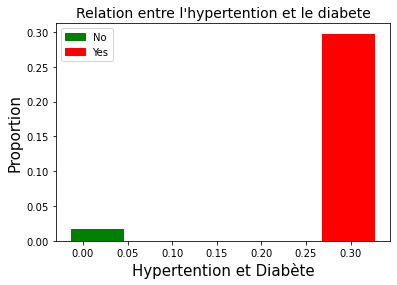

In [611]:
plot_bar(df_hyp_diab,df_hyp_diab,'Hypertention et Diabète', 'Proportion',
         'Relation entre l\'hypertention et le diabete') #Appel de la fonction plot_bar

En moyenne près de 30 % des patients hypertendus sont aussi diabétiques. 

### Q5: Les patients qui ont pu voir leur rendez-vous ont-ils bénéficiés du programme welfare?

In [231]:
#Compter le nombre de patients qui ont bénéficé du programme welfare et qui ont vu leur rendez-vous
df_plan_copi.query('RV_Vu == "Yes"')['Prog_welfare'].value_counts()

0    19741
1     2578
Name: Prog_welfare, dtype: int64

In [234]:
#Proportion des patients bénéficiant du programme welfare par rapport à 
#ceux qui ont vu leur rendez-vous

len(df_plan_copi.query('Prog_welfare == 1'))/len(df_plan_copi.query('RV_Vu == "Yes"'))*100

48.662574488104305

48.66% des patients ayant bénéficié de l'assistance social avec le programme welfare ont vu leur rendez-vous.

### Q6: Combien de patients femmes ou hommes sont-ils alcooliques?

In [545]:
#Extraire les patient alcooliques
df_alc = df_plan_copi.query('Alcoolique == 1')

In [546]:
#visualisation des patients alcooliques suivant le sexe
df_alc_pie = df_alc['sexe'].value_counts()

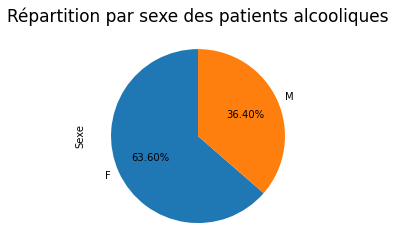

In [616]:
plot_pie(df_alc_pie, "F","M",'Répartition par sexe des patients alcooliques') #Appel de la fonction plot_pie

On constate que dans cette partie nous avons plus de patients hommes alcooliques que de femmes, avec soit 63.60% contre 36.40%.  

### Q7:Y a-t-il une corrélation entre le sexe et le diabete?

In [612]:
#Visualisation en barres de la moyenne des variables sexe et Diabete 

df_sex_Diab = df_plan_copi.groupby('sexe')['Diabete'].mean()

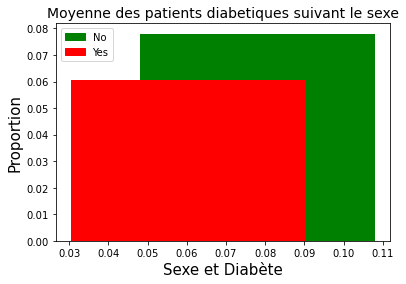

In [613]:
plot_bar(df_sex_Diab,df_sex_Diab,"Sexe et Diabète", 'Proportion',
         'Moyenne des patients diabetiques suivant le sexe') #Appel de la fonction plot_bar

On constate que c'est plus susceptible d'avoir le diabete quand on est femme que homme.
Soit 7.8% des diabétiques sont des femmes contre 6% pour les hommes.

<a id='conclusions'></a>
## Conclusions

* En résumé, les données nous montrent que seulement 43% des patients ont pu voir leur rendez-vous malgré les messages envoyés.

* Pour le programme d'aide social (welfare) 81.51% des bénéficiaires sont des femmes et que 48.66% des patients de ce programme ont vu leur rendez-vous.

* L'âge moyen des patients qui ont pu voir leur rendez-vous est de 34ans. En outre on a constaté que 30% des patients hypertendus sont aussi diabétiques.

* Les patients alcooliques sont plus présents chez les hommes que chez lez femmes, soit 63.60% contre 36.40% pour les femmes.

* La relation entre le sexe et le diabete n'est pas très accentuée pour nous permettre de poser des hypothèses fortes.


* Les statistiques descriptives ont montré que dans l'ensemble du jeu de données plus de 50% des patients ont 37ans.


## **Limitations**

Le constat fait au niveau de la Q1 ne nous permet pas de tirer une conclusion définitive s'il y a une forte corrélation entre le fait de recevoir un sms et de voir son rendez-vous. Dans une fouille poussée, en utilisant par exemple les outils de test-hypothèses nous pourions mieux nous positionner sur cette question.

En outre, pour la relation entre le sexe et le diabète Q7, on a pas une grande différence des proportions au niveau des deux sexes pour nous positionner. Il faut peut être songer à augmenter les données. 

### REFERENCES

<li><a href='http://www.learningaboutelectronics.com/Articles/How-to-create-a-pie-chart-in-matplotlib-with-Python.php'>Pie chart</a></li>


<li><a href='https://stackoverflow.com/questions/57340415/matplotlib-bar-plot-add-legend-from-categories-dataframe-column'>matplotlib barplot</a></li>
